# Handling data

## Environment setup

In [1]:
import platform

print(f"Python version: {platform.python_version()}")

import numpy as np
import matplotlib.pyplot as plt

print(f"NumPy version: {np.__version__}")

Python version: 3.11.1
NumPy version: 1.23.5


In [2]:
# Setup plots
%matplotlib inline
plt.rcParams["figure.figsize"] = 10, 8
%config InlineBackend.figure_format = "retina"

In [3]:
import sklearn

print(f"scikit-learn version: {sklearn.__version__}")

from sklearn.datasets import load_sample_images
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, scale, StandardScaler, OneHotEncoder

scikit-learn version: 1.2.2


## Problem formulation

### Inputs

- $m$: number of samples and associated results in the dataset.
- $n$: number of features. A **feature** is an attribute (a property) of the data samples.
- $\pmb{x}^{(i)}$: *i*th data **sample** (example), vector of $n$ features.
- $x^{(i)}_j$: value of the $j$th feature for the $i$th data sample.

$$\pmb{x}^{(i)} = \begin{pmatrix}
       \ x^{(i)}_1 \\
       \ x^{(i)}_2 \\
       \ \vdots \\
       \ x^{(i)}_n
     \end{pmatrix} \in \pmb{R}^n$$

### Design matrix

$\pmb{X}$: matrix of shape (*samples, features*) expected by most ML algorithms, often called **design matrix**.
- First dimension is for the $m$ samples.
- Second dimension is for the $n$ features of each sample.

$$\pmb{X} = \begin{bmatrix}
       \ \pmb{x}^{(1)T} \\
       \ \pmb{x}^{(2)T} \\
       \ \vdots \\
       \ \pmb{x}^{(m)T} \\
     \end{bmatrix} = 
\begin{bmatrix}
       \ x^{(1)}_1 & x^{(1)}_2 & \cdots & x^{(1)}_n \\
       \ x^{(2)}_1 & x^{(2)}_2 & \cdots & x^{(2)}_n \\
       \ \vdots & \vdots & \ddots & \vdots \\
       \ x^{(m)}_1 & x^{(m)}_2 & \cdots & x^{(m)}_n
     \end{bmatrix} \in \pmb{R}^{m \times n}$$

### Targets

- $y^{(i)}$: **target** or **label** (expected result) for the *i*th data sample.
- $\pmb{y}$: vector of labels for all $m$ samples in a dataset.

$$\pmb{y} = \begin{pmatrix}
       \ y^{(1)} \\
       \ y^{(2)} \\
       \ \vdots \\
       \ y^{(m)}
     \end{pmatrix} \in \pmb{R}^m$$

## Tensors

### Definition

In the context of Data Science, a **tensor** is a set of primitive values (almost always numbers) shaped into an array of any number of dimensions. It is a fancy name for a multidimensional numerical array.

Tensors are the core data structures of Machine Learning.

### Tensor properties

- A tensor's **rank** is its number of dimensions. 
- A dimension is often called an **axis**. 
- The tensor's **shape** describes the number of values along each axis.

The number of entries along a specific axis is also called **dimension**, which can be somewhat confusing. A 3 dimensions *vector* is not the same as a 3 dimensions *tensor*.

### Manipulating tensors in Python

[NumPy](https://numpy.org/) supports tensors in the form of `ndarray` objects. It offers a comprehensive set of operations on them, including creating, sorting, selecting, linear algebra and statistical operations. See [API reference](../tools/numpy) for more details.

[PyTorch](https://pytorch.org) provides a NumPy-like API for manipulating tensors. Contrary to NumPy's, PyTorch tensors can be located on a GPU (if available) for faster computations. See [API reference](../tools/pytorch) for more details.

[TensorFlow](https://www.tensorflow.org/) also has support for tensors, but its API is somewhat more cumbersome.

#### Creating tensors with NumPy

The `np.array()` function creates and returns a new tensor.

[![NumPy array creation](images/numpy_array.png)](https://numpy.org/doc/stable/user/absolute_beginners.html#how-to-create-a-basic-array)

In [4]:
def print_tensor_info(t):
    print(t)
    print(f"Dimensions: {t.ndim}")
    print(f"Shape: {t.shape}")

In [5]:
# Scalar
x = np.array(12)

print_tensor_info(x)

12
Dimensions: 0
Shape: ()


In [6]:
# Vector (1D tensor)
x = np.array([1, 2, 3])

print_tensor_info(x)

[1 2 3]
Dimensions: 1
Shape: (3,)


In [7]:
# Matrix (2D tensor)
x = np.array([[5, 78, 2, 34, 0], [6, 79, 3, 35, 1], [7, 80, 4, 36, 2]])

print_tensor_info(x)

[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]]
Dimensions: 2
Shape: (3, 5)


In [8]:
# 3D tensor
x = np.array(
    [
        [[5, 78, 2, 34, 0], [6, 79, 3, 35, 1]],
        [[5, 78, 2, 34, 0], [6, 79, 3, 35, 1]],
        [[5, 78, 2, 34, 0], [6, 79, 3, 35, 1]],
    ]
)

print_tensor_info(x)

[[[ 5 78  2 34  0]
  [ 6 79  3 35  1]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]]]
Dimensions: 3
Shape: (3, 2, 5)


### Tensor shape management

A common operation on tensors is **reshaping**: giving it a new shape without changing its data.

The new shape must be compatible with the current one: the new tensor needs to have the same number of elements as the original one.

[![NumPy reshaping](images/numpy_reshaping.png)](https://numpy.org/doc/stable/user/absolute_beginners.html#transposing-and-reshaping-a-matrix)

In [9]:
# Reshape a (3, 2) matrix into a (2, 3) matrix
x = np.array([[1, 2],
              [3, 4],
              [5, 6]])
x_reshaped = x.reshape(2, 3)

print_tensor_info(x_reshaped)

[[1 2 3]
 [4 5 6]]
Dimensions: 2
Shape: (2, 3)


In [10]:
# Reshape a matrix into a vector
x = np.array([[1, 2],
              [3, 4],
              [5, 6]])
x_reshaped = x.reshape(6, )

print_tensor_info(x_reshaped)

[1 2 3 4 5 6]
Dimensions: 1
Shape: (6,)


In [11]:
x = np.array([[1, 2],
              [3, 4],
              [5, 6]])
# Error: incompatible shapes!
# x.reshape(5, )

#### Reshaping images and videos

A bitmap image can be represented as a 3D multidimensional array (*height, width, color_channels*).

A video can be represented as a 4D multidimensional array (*frames, height, width, color_channels*).

They have to be **reshaped** (*flattened* in that case) into a vector before being fed to most ML algorithms.

![Image to vector](images/image2vector.jpeg)

Sample image: (427, 640, 3)


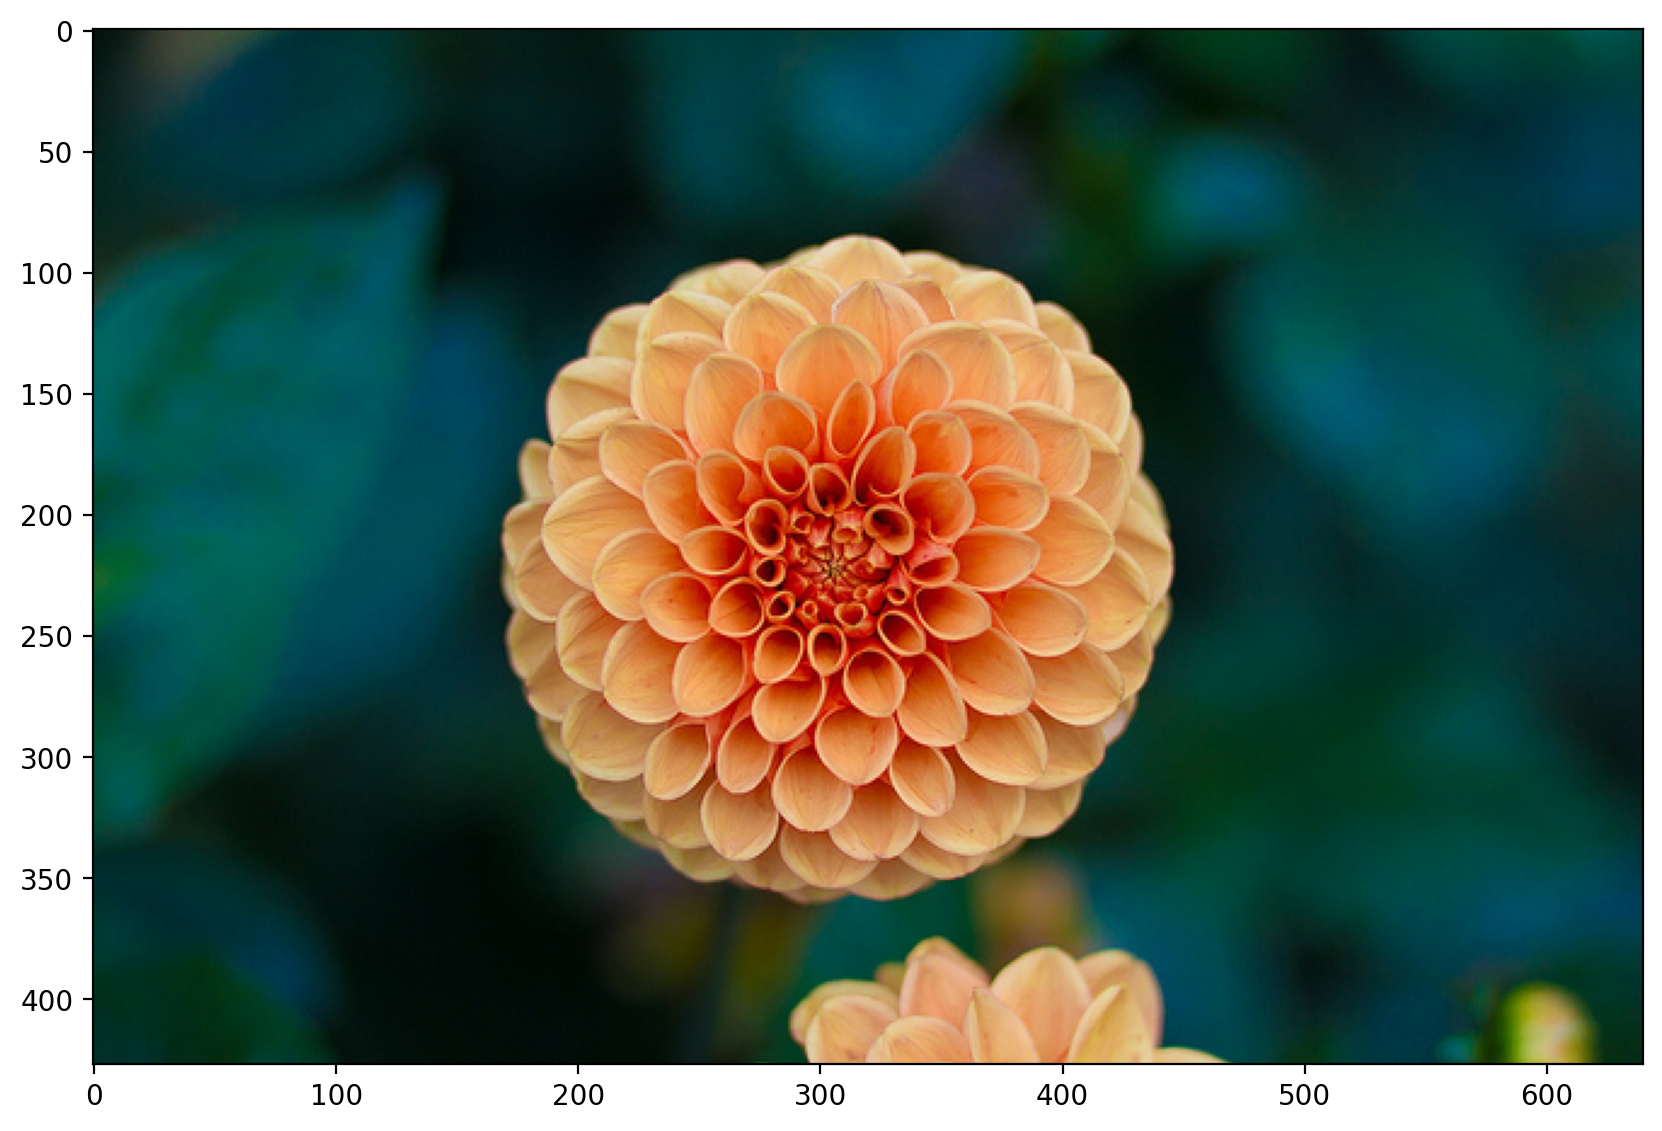

In [12]:
# Load a sample image from scikit-learn
sample_image = np.asarray(load_sample_images().images)[1]

# Display image
plt.imshow(sample_image)

print(f"Sample image: {sample_image.shape}")

In [13]:
# Flatten image (3D tensor) into a vector (1D tensor)
flattened_image = sample_image.reshape((427 * 640 * 3,))

# Alternative syntaxes for an identical result
# -1 means the new dimension is inferred from current dimensions
# Diference between flatten() and ravel() is explained here:
# https://numpy.org/doc/stable/user/absolute_beginners.html#reshaping-and-flattening-multidimensional-arrays
flattened_image = sample_image.reshape((-1,))
flattened_image = sample_image.ravel()
flattened_image = sample_image.flatten()

print(f"Flattened image: {flattened_image.shape}")

# Reshaped vector dimension is equal to the product of image dimensions
assert flattened_image.shape[0] == 819840 == 427 * 640 * 3

Flattened image: (819840,)


### Tensor indexing and slicing

Tensors can be indexed and sliced just like regular Python lists.

[![NumPy indexing](images/numpy_indexing.png)](https://numpy.org/doc/stable/user/absolute_beginners.html#indexing-and-slicing)

In [14]:
data = np.array([1, 2, 3])

# Select element at index 1
assert data[1] == 2

# Select elements between indexes 0 (included) and 2 (excluded)
assert np.array_equal(data[0:2], [1, 2])

# Select elements starting at index 1 (included)
assert np.array_equal(data[1:], [2, 3])

# Select all elements but last one
assert np.array_equal(data[:-1], [1, 2])

# Select last 2 elements
assert np.array_equal(data[-2:], [2, 3])

# Select second-to-last element
assert np.array_equal(data[-2:-1], [2])

### Tensor axes

Many tensor operations can be applied along one or several **axes**. They are indexed starting at 0.

[![NumPy axes](images/numpy_axes.png)](https://www.sharpsightlabs.com/blog/numpy-axes-explained/)

In [15]:
# Create a matrix (2D tensor)
x = np.array([[1, 1], [2, 2]])

# Summing on first axis (rows)
print(x.sum(axis=0))

# Summing on second axis (columns)
print(x.sum(axis=1))

[3 3]
[2 4]


### Broadcasting

**Broadcasting** is a mechanism that allows operations to be performed on tensors of different shapes. Subject to [certain constraints](https://numpy.org/doc/stable/user/basics.broadcasting.html#general-broadcasting-rules), the smaller tensor may be “broadcast” across the larger one so that they have compatible shapes.

[![NumPy broadcasting](images/numpy_broadcasting.png)](https://numpy.org/doc/stable/user/absolute_beginners.html#broadcasting)

Broadcasting provides a efficient means of vectorizing tensor operations.

In [16]:
x = np.array([1.0, 2.0])
print(x * 1.6)

[1.6 3.2]


## Common operations

### Dataset splitting

In order to estimate performance in production context, available data is always split into two sets:

- **Training set** (typically 80% or more): used during training.
- **Test set**: used to check the model's performance on previously unseen data.

Inputs and targets should be split simultaneously in order to preserve matching.

In [17]:
# Create a random (30,4) matrix and a random (30,) vector
x = np.random.rand(30, 4)  # Fictitious inputs
y = np.random.rand(30)  # Fictitious target
print(f"x: {x.shape}. y: {y.shape}")

# Split dataset between training and test sets, using a 75/25 ratio
# Matching between x and y is preserved
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

print(f"x_train: {x_train.shape}. y_train: {y_train.shape}")
print(f"x_test: {x_test.shape}. y_test: {y_test.shape}")

x: (30, 4). y: (30,)
x_train: (22, 4). y_train: (22,)
x_test: (8, 4). y_test: (8,)


### Feature scaling

Most ML algorithms work best when all features have a **similar scale**. Several solutions exist:

- **Min-Max scaling**: features are shifted and rescaled to the $[0,1]$ range by substracting the `min` value and dividing by `(max-min)` on the first axis.
- **Standardization**: features are centered (substracted by their mean) then reduced (divided by their standard deviation) on the first axis. All resulting features have a mean of 0 and a standard deviation of 1.

To avoid [information leakage](https://stats.stackexchange.com/a/174865), the test set must be scaled with values calculated on the training set.

In [18]:
# Generate a random (3,4) tensor with integer values between 1 and 10
x = np.random.randint(1, 10, (3, 4))
print(x)

# Compute min and max for features (columns), then scale tensor
min = x.min(axis=0)
max = x.max(axis=0)
x_scaled = (x - min) / (max - min)

print(x_scaled)
print(f"Minimum: {x_scaled.min(axis=0)}. Maximum: {x_scaled.max(axis=0)}")

# Compute min and max then scale tensor in one operation
x_scaled = MinMaxScaler().fit_transform(x)

print(x_scaled)
print(f"Minimum: {x_scaled.min(axis=0)}. Maximum: {x_scaled.max(axis=0)}")

[[3 9 8 1]
 [8 5 6 9]
 [5 3 4 5]]
[[0.         1.         1.         0.        ]
 [1.         0.33333333 0.5        1.        ]
 [0.4        0.         0.         0.5       ]]
Minimum: [0. 0. 0. 0.]. Maximum: [1. 1. 1. 1.]
[[0.         1.         1.         0.        ]
 [1.         0.33333333 0.5        1.        ]
 [0.4        0.         0.         0.5       ]]
Minimum: [0. 0. 0. 0.]. Maximum: [1. 1. 1. 1.]


In [19]:
# Generate a random (3,4) tensor with integer values between 1 and 10
x = np.random.randint(1, 10, (3, 4))
print(x)

# Compute mean and std, then standardize tensor in one operation
x_standard = scale(x)

print(x_standard)
print(f"Mean: {x_standard.mean(axis=0)}")
print(f"Std: {x_standard.std(axis=0)}")

[[9 1 5 5]
 [7 8 3 5]
 [9 7 1 1]]
[[ 0.70710678 -1.40182605  1.22474487  0.70710678]
 [-1.41421356  0.86266219  0.          0.70710678]
 [ 0.70710678  0.53916387 -1.22474487 -1.41421356]]
Mean: [-5.92118946e-16  7.40148683e-17  0.00000000e+00  7.40148683e-17]
Std: [1. 1. 1. 1.]


In [20]:
# Compute mean and std on training set
scaler = StandardScaler().fit(x_train)

# Standardize training and test sets, using mean and std computed on training set
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(f"Train mean: {x_train_scaled.mean(axis=0)}")
print(f"Train std: {x_train_scaled.std(axis=0)}")
print(f"Test mean: {x_test_scaled.mean(axis=0)}")
print(f"Test std: {x_test_scaled.std(axis=0)}")

Train mean: [ 3.22973971e-16 -9.08364293e-17 -3.53252781e-17  5.24832703e-16]
Train std: [1. 1. 1. 1.]
Test mean: [ 0.22795318 -0.49120847 -0.34399297  0.11494666]
Test std: [0.85152578 1.10953828 0.92824746 0.81104679]


#### Scaling images and videos

Individual pixel values for images and videos are typically integers in the $[0,255]$ range. This is not ideal for most ML algorithms.

Dividing them by 255.0 to obtain floats into the $[0,1]$ range is a common practice.

In [21]:
# Scaling sample image pixels between 0 and 1
scaled_image = sample_image / 255.0

# Check that all values are in the [0:1] range
assert scaled_image.min() >= 0
assert scaled_image.max() <= 1

### Encoding categorical features

Some features or targets may come as discrete rather than continuous values. Moreover, these discrete values might be strings. ML models are only able to manage numerical-only data.

A solution is to apply one-of-K encoding, also named dummy encoding or **one-hot encoding**. Each categorical feature with `K` possible values is transformed into a vector of `K` binary features, with one of them 1 and all others 0.

In [22]:
# Create a categorical variable with 3 different string values
x = [["GOOD"], ["AVERAGE"], ["GOOD"], ["POOR"], ["POOR"]]

# Encoder input must be a matrix
# Output will be a sparse matrix where each column corresponds to one possible value of one feature
encoder = OneHotEncoder().fit(x)
x_hot = encoder.transform(x).toarray()

print(x_hot)
print(encoder.categories_)

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
[array(['AVERAGE', 'GOOD', 'POOR'], dtype=object)]


In [23]:
# Generate a (5,1) tensor with integer values between 0 and 9
x = np.random.randint(0, 9, (5, 1))
print(x)

# Encoder input must be a matrix
# Output will be a sparse matrix where each column corresponds to one possible value of one feature
x_hot = OneHotEncoder().fit_transform(x).toarray()

print(x_hot)

[[0]
 [3]
 [7]
 [5]
 [3]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


#### One-hot encoding and training/test sets

Depending on value distribution between training and test sets, some categories might appear only in one set.

The best solution is to one-hot encode based on the training set categories, ignoring test-only categories.

In [24]:
x_train = [["Blue"], ["Red"], ["Blue"], ["Green"]]
x_test = [["Red"], ["Yellow"], ["Green"]]  # "Yellow" not present in training set

# Using categories from train set, ignoring unkwown categories
encoder = OneHotEncoder(handle_unknown="ignore").fit(x_train)
print(encoder.transform(x_train).toarray())
print(encoder.categories_)

# Unknown categories will result in a binary vector will all zeros
print(encoder.transform(x_test).toarray())

[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
[array(['Blue', 'Green', 'Red'], dtype=object)]
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 1. 0.]]


### Handling missing values

Most ML algorithms cannot work with missing values in features.

Depending on the percentage of missing data, three options exist:
- remove the corresponding data samples;
- remove the whole feature(s);
- replace the missing values (using 0, the mean, the median or something more meaningful in the context).

In [25]:
x = np.array([[7, 2, np.nan], [4, np.nan, 6], [10, 5, 9]])
print(x)

# Replace missing values with column-wise mean
print(SimpleImputer(strategy="mean").fit_transform(x))

[[ 7.  2. nan]
 [ 4. nan  6.]
 [10.  5.  9.]]
[[ 7.   2.   7.5]
 [ 4.   3.5  6. ]
 [10.   5.   9. ]]


In [26]:
x = [["M"], ["M"], [None], ["F"]]

# Replace missing values with constant
print(
    SimpleImputer(
        strategy="constant", missing_values=None, fill_value="Unknown"
    ).fit_transform(x)
)

[['M']
 ['M']
 ['Unknown']
 ['F']]


### Data augmentation

**Data augmentation** is the process of enriching a dataset by adding new samples, slightly modified copies of existing data or newly created synthetic data.

[![Image augmentation example](images/image_augmentation.png)](https://towardsdatascience.com/machinex-image-data-augmentation-using-keras-b459ef87cd22)

### Feature engineering

**Feature engineering** is the process of preparing the proper input features, in order to facilitate the learning task. The problem is made easier by expressing it in a simpler way. This usually requires a good domain knowledge.

The ability of deep neural networks to discover useful features by themselves has somewhat reduced the criticality of feature engineering. Nevertheless, it remains important in order to solve problems more elegantly and with fewer data.

Example: the task of learning the time of day from a clock is far easier with engineered features rather than raw clock images.

[![Feature engineering](images/feature_engineering.png)](https://www.manning.com/books/deep-learning-with-python)